In [ ]:
%run DataCleaning.ipynb

**Applying PCA**

In [5]:
import pandas as pd

train_df = pd.read_csv('csvs/train_df.csv')

In [ ]:
#TODO: add and or change source of the following. also double check the features before applying PCA
#TODO: find out about categorial vairables in the context of PCA. good source in general: https://webpages.uidaho.edu/~stevel/519/applied%20multivariate%20statistics%20Hardle%20and%20Simar.pdf

## Choosing the Right Number of Principal Components
https://www.baeldung.com/cs/pca 
The eigenvalue $\lambda_i$ represents the variance of the data along the direction of the corresponding principal component. Hence the components with the lowest eigenvalues contain the least information, so they can be dropped. The importance of each component is represented by the so-called *explained variance ratio*, which indicates the portion of the variance that lies along each principal component:

$$
\text{explained variance ratio of the } i\text{-th component} = \frac{\lambda_i}{\sum_{j=1}^{D} \lambda_j}.
$$

Note that sum at the denominator is performed over the maximum number of principal components.

By summing the explained variance ratio of the first $N_{pc}$ components, we obtain the so-called *cumulative explained variance*:

$$
\text{cumulative explained variance of the first } N_{pc} \text{ components} = \sum_{i=1}^{N_{pc}} \frac{\lambda_i}{\sum_{j=1}^{D} \lambda_j}.
$$

A good strategy is to choose the number of dimensions for which the cumulative explained variance exceeds a threshold, e.g., 0.95 (95%).




In [16]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(train_df)  # Fit PCA on the training data

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

15


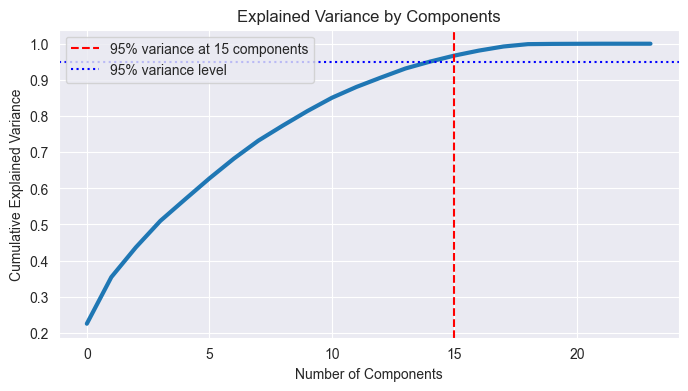

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(cumsum, linewidth=3)
plt.axvline(x=d, color='r', linestyle='--', label=f'95% variance at {d} components')
plt.axhline(y=0.95, color='b', linestyle=':', label='95% variance level')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# TODO: edit after this line (will do on friday most likely)

In [ ]:
# Use the indices to split the principal_components array and SPEED column for training and testing
X_train_pca = principal_components[train_indices]
X_test_pca = principal_components[test_indices]

y_train = local_traffic_merged.loc[train_indices, 'SPEED']
y_test = local_traffic_merged.loc[test_indices, 'SPEED']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_pca, y_train)

r_squared = model.score(X_test_pca, y_test)
print(f"Model R^2 Score: {r_squared}")

# Calculate MSE and MAE
predictions = model.predict(X_test_pca)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")